## **WEEK 5 EXERCISES - Factorials Designs**
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.power as smp
import statsmodels.stats.proportion as smprop

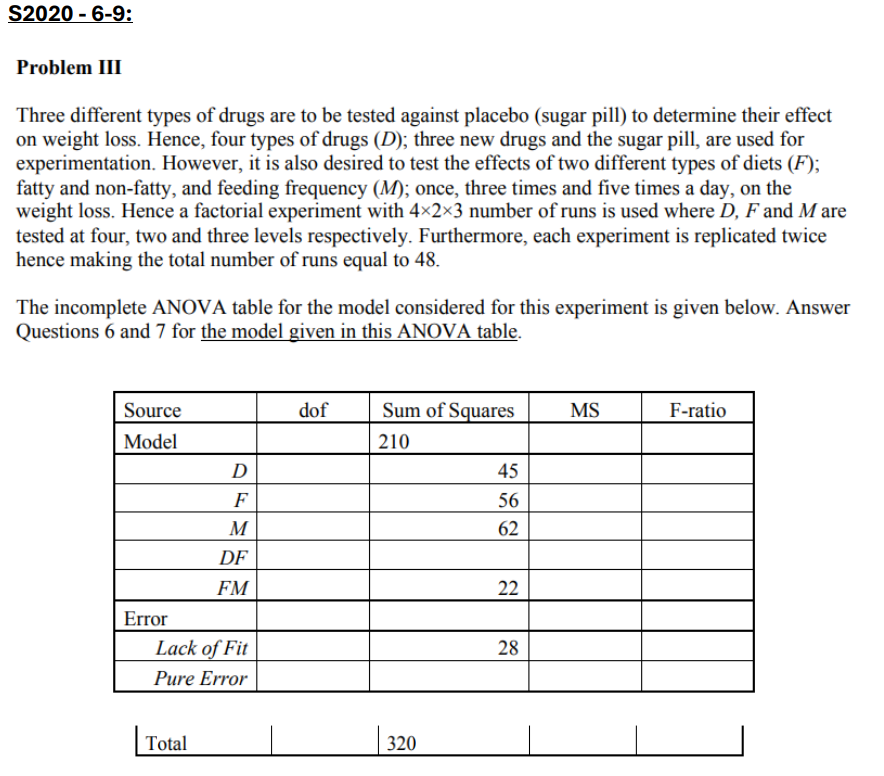

## Q1:

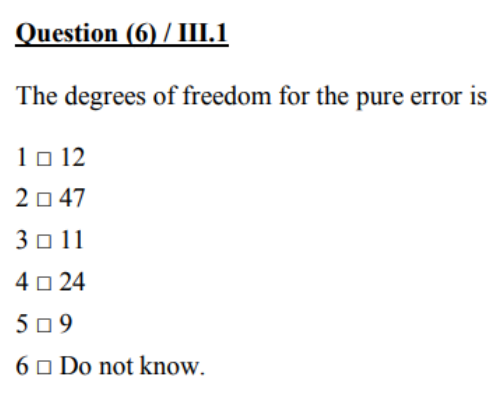

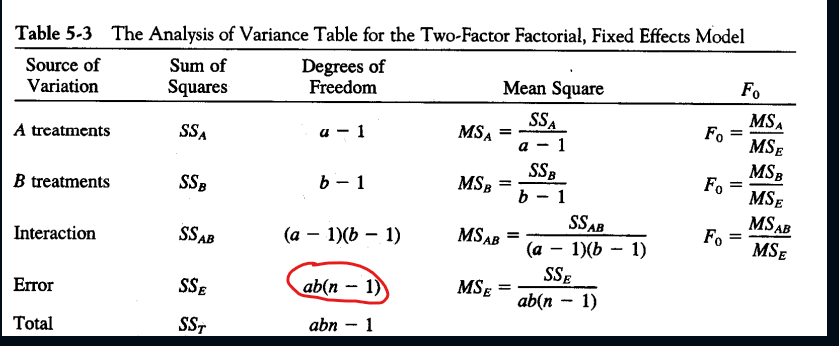

We just have one more factor we call c ( in the exercise its M)

In [56]:
D = 4

F = 2

M = 3

n = 2

pure_error = D*F*M*(n-1)

print(pure_error)

24


**Answer 4 is correct**

## Q2:
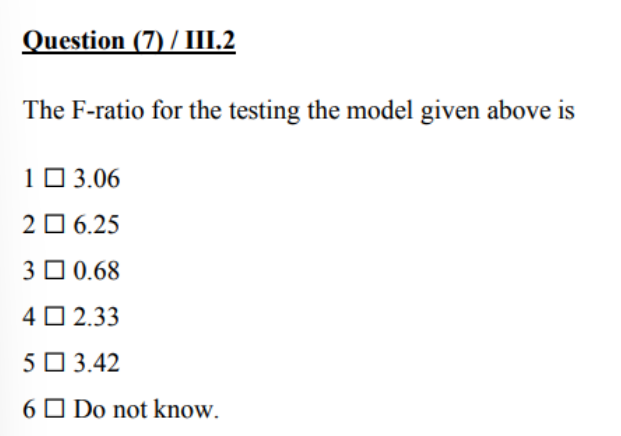

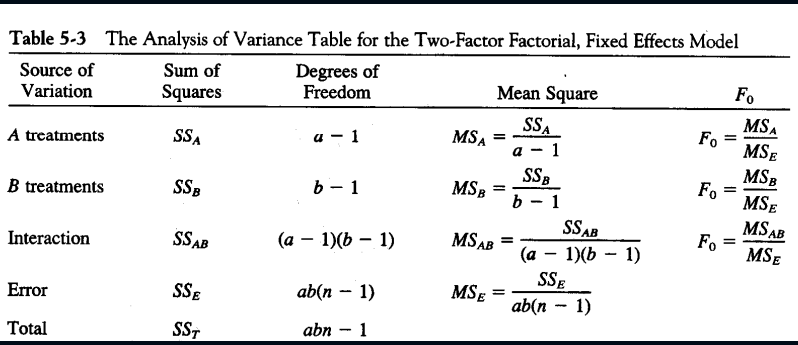

In [2]:
# Levels and replicates
a = 4   # D
b = 2   # F
c = 3   # M
n = 2   # replicates

# Total runs
N = a * b * c * n
df_total = N - 1

# Factor dfs
df_D = a - 1
df_F = b - 1
df_M = c - 1

# Interactions
df_DF = (a - 1) * (b - 1)
df_FM = (b - 1) * (c - 1)

# Model df
df_model = df_D + df_F + df_M + df_DF + df_FM

# Error df
df_error = df_total - df_model

# Pure error df = abc(n-1)
df_pure = a * b * c * (n - 1)

print("Total df:", df_total)
print("Model df:", df_model)
print("Error df:", df_error)
print("Pure error df (abc*(n-1)):", df_pure)   # <- Answer for Q6


Total df: 47
Model df: 11
Error df: 36
Pure error df (abc*(n-1)): 24


In [6]:
df_lof  = df_error - df_pure  

SS_model = 210.0
SS_total = 320.0
SS_lof   = 28.0    
  
SS_error = SS_total - SS_model          
SS_pure  = SS_error - SS_lof           



MS_model = SS_model / df_model
MS_error = SS_error / df_error


F_model = MS_model / MS_error


print("F (overall model):", F_model)   


F (overall model): 6.247933884297521


Husk at SS_T = SS_E + SS_M, hvilket vil sige at SS_E = SS_T - SS_M

## Q3:
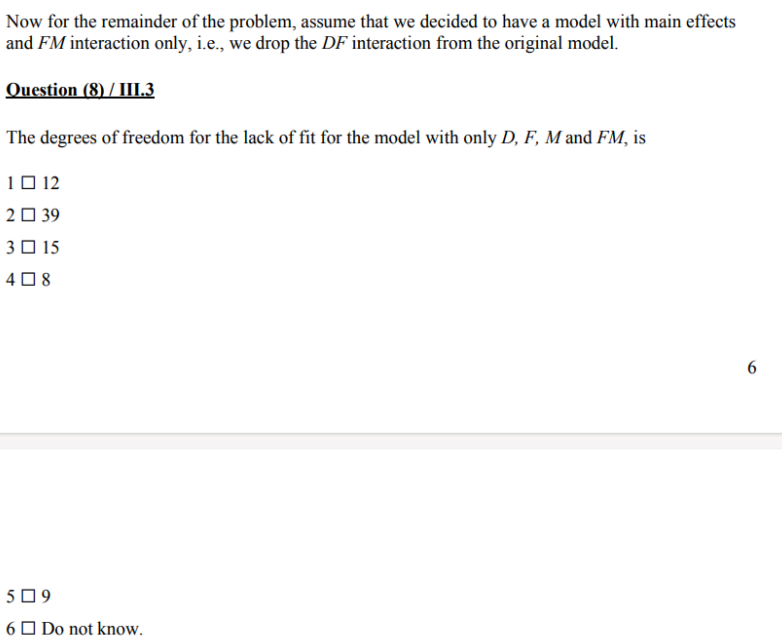

In [58]:
df_total = N - 1

df_D = a - 1
df_F = b - 1
df_M = c - 1

df_FM = (b - 1) * (c - 1)

# Model df
df_model = df_D + df_F + df_M + df_FM

# Error df
df_error = df_total - df_model

# Pure error df from Table 5-3 generalized to 3 factors: abc(n-1)
df_pure = a * b * c * (n - 1)

# Lack-of-fit df is what's left in Error
df_lof = df_error - df_pure
print("Lack-of-fit df (new model):", df_lof)  # <- Q8 answer: 26

Lack-of-fit df (new model): 15


## Q4:
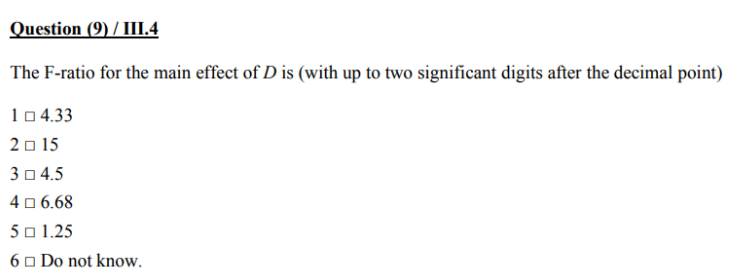

In [3]:

# Given values
SS_T = 320        # Total sum of squares
SS_M_orig = 210   # Original model SS
SS_D = 45         # Sum of squares for factor D
df_D = 4 - 1      # Degrees of freedom for D

# Step 1: Find SS for DF (since it was in original model but is dropped now)
SS_DF = SS_M_orig - (SS_D + 56 + 62 + 22)

# Step 2: New model SS (drop DF)
SS_M_new = SS_M_orig - SS_DF

# Step 3: New error SS
SS_E_new = SS_T - SS_M_new

# Step 4: New error df
df_total = 48 - 1              # total df
df_model_new = (4-1) + (2-1) + (3-1) + (2-1)*(3-1)   # D + F + M + FM
df_error_new = df_total - df_model_new

# Step 5: Mean squares
MS_D = SS_D / df_D
MS_E_new = SS_E_new / df_error_new

# Step 6: F-ratio for D
F_D = MS_D / MS_E_new
print("F-ratio for D =", round(F_D, 2))




25
F-ratio for D = 4.33


---
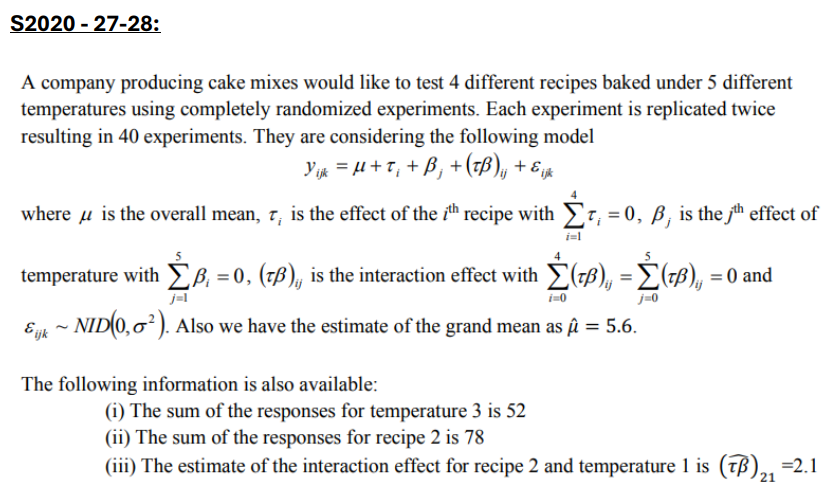
## Q5:
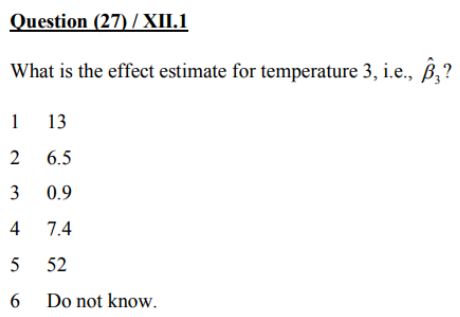


## 2. The Model

The given model is:

y_ijk = μ + τ_i + β_j + (τβ)_ij + ε_ijk

Where:
- μ = grand mean (overall mean response, estimated as 5.6 here).
- τ_i = effect of the i-th recipe.
- β_j = effect of the j-th temperature.
- (τβ)_ij = interaction effect between recipe i and temperature j.
- ε_ijk = random error.

### Constraints:
- Sum of all recipe effects = 0 → Σ τ_i = 0
- Sum of all temperature effects = 0 → Σ β_j = 0
- Sum of all interactions across recipes = 0, and across temperatures = 0


In [61]:

# Given values
grand_mean = 5.6
sum_temp3 = 52
a = 4  # recipes
b = 5  # temperatures
n = 2  # replicates

# Number of obs at temp 3
N_temp3 = a * n
mean_temp3 = sum_temp3 / N_temp3

beta3_hat = mean_temp3 - grand_mean
print("Q27: beta3_hat =", beta3_hat)


Q27: beta3_hat = 0.9000000000000004


## Q6:
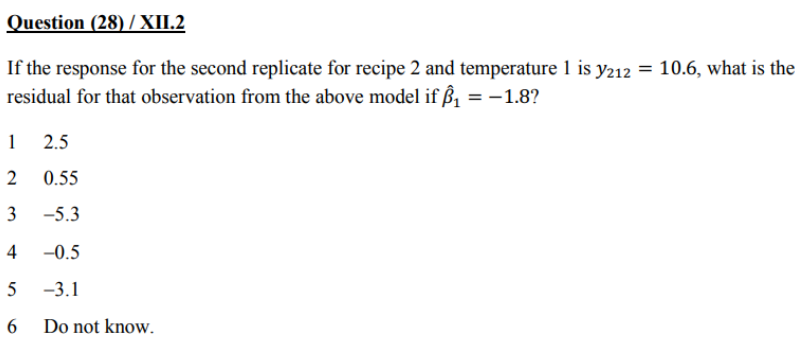

In [ ]:

sum_recipe2 = 78
N_recipe2 = b * n

mean_recipe2 = sum_recipe2 / N_recipe2
tau2_hat = mean_recipe2 - grand_mean


beta1_hat = -1.8
interaction_21_hat = 2.1
y212 = 10.6

# Predicted value
yhat_212 = grand_mean + tau2_hat + beta1_hat + interaction_21_hat
residual = y212 - yhat_212
print("Q28: residual =", residual)

Q28: residual = 2.5


---
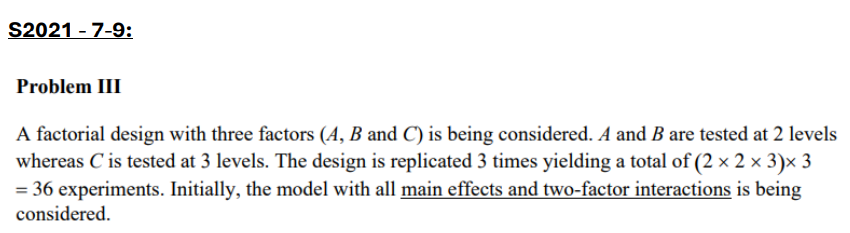
## Q7
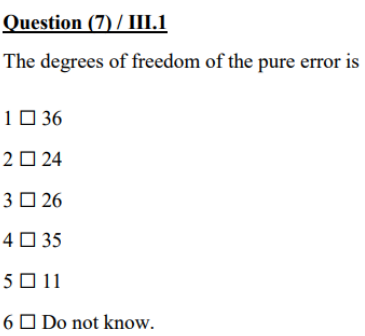

In [63]:
# Factors: A(2 lvls), B(2), C(3); r = 3 replicates
a, b, c, r = 2, 2, 3, 3

N = a*b*c*r                 # total runs
t = a*b*c                   # unique treatment combinations (cells)

# Q7: pure error df = N - t
df_pure_error = N - t


df_pure_error


24

## Q8:
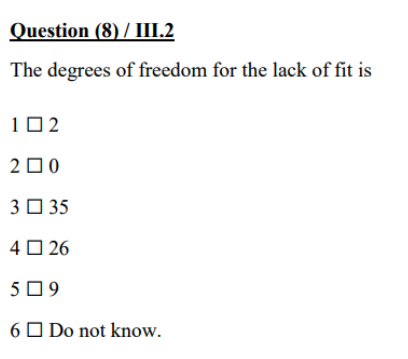

remeber that df_LOF ​= t − p

In [65]:
# Main effects
df_A  = a - 1
df_B  = b - 1
df_C  = c - 1

# Two-factor interactions
df_AB = (a - 1) * (b - 1)
df_AC = (a - 1) * (c - 1)
df_BC = (b - 1) * (c - 1)

# Total parameters excluding intercept
params_initial = df_A + df_B + df_C + df_AB + df_AC + df_BC

# Lack-of-fit df = t - (params + 1 for intercept)
df_lof_initial = t - (params_initial + 1)
print("Q8 Lack-of-fit df (initial model) =", df_lof_initial)

Q8 Lack-of-fit df (initial model) = 2


## Q9:
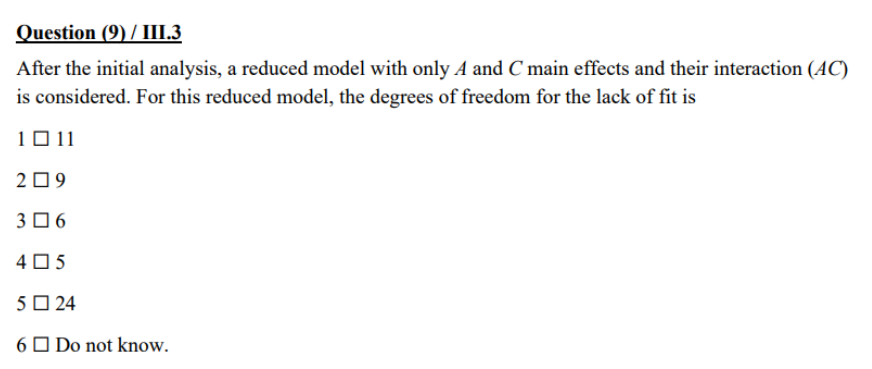

In [66]:
params_reduced = df_A + df_C + df_AC
df_lof_reduced = t - (params_reduced + 1)
print("Q9 Lack-of-fit df (reduced model) =", df_lof_reduced)

Q9 Lack-of-fit df (reduced model) = 6


---
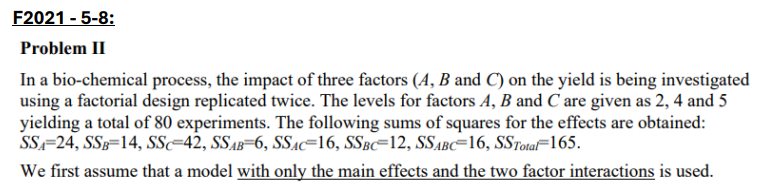
## Q10
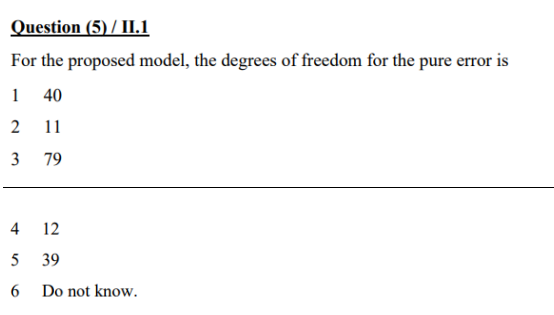

In [67]:
# Design: A=2 levels, B=4 levels, C=5 levels, replicated r=2
a, b, c, r = 2, 4, 5, 2

# Totals
t = a*b*c            # number of treatment combinations (cells)
N = t*r              # total runs

# Given sums of squares
SS_A, SS_B, SS_C   = 24, 14, 42
SS_AB, SS_AC, SS_BC = 6, 16, 12
SS_ABC = 16
SS_total = 165

# ---------------- Q(5) / II.1 ----------------
df_pure = N - t
print("Pure error df =", df_pure)  # 80 - 40 = 40

Pure error df = 40


## Q11
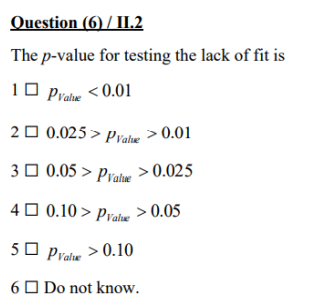

In [71]:
import scipy.stats as stats


SS_lof, df_lof = 16, 12
SS_pure, df_pure = 35, 40

MS_lof = SS_lof / df_lof
MS_pure = SS_pure / df_pure
F = MS_lof / MS_pure

# p-value (upper-tail)
p_value = 1 - stats.f.cdf(F, df_lof, df_pure)
F, p_value


(1.5238095238095237, 0.15596615627989474)

## Q12
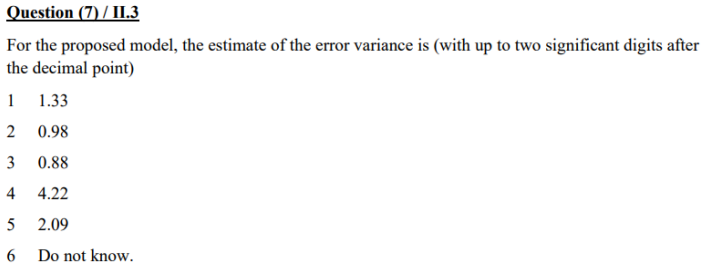

In [73]:
SS_error = SS_lof + SS_pure
df_error = df_lof + df_pure

MS_error = SS_error / df_error
print("MS_error =", MS_error)

MS_error = 0.9807692307692307


## Q13
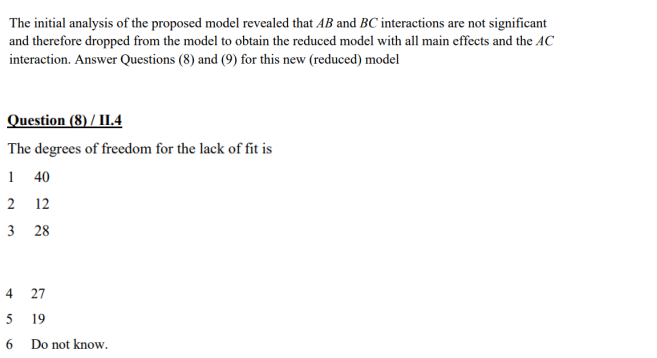

In [ ]:
# Factors
a, b, c, r = 2, 4, 5, 2

# Number of treatment combinations
t = a * b * c   # 40

# Reduced model: A, B, C, AC
df_A  = a - 1
df_B  = b - 1
df_C  = c - 1
df_AC = (a - 1) * (c - 1)

# Parameters (including intercept +1)
p_reduced = 1 + (df_A + df_B + df_C + df_AC)

# Lack of fit df
df_lof_reduced = t - p_reduced
print("Q(8) Lack of fit df (reduced model) =", df_lof_reduced)


Q(8) Lack of fit df (reduced model) = 27
